## ANN Cons:
- ### Too much computation
- ### Treats local pixels same as pixels far apart
- ### Sensitive to location of an object in an image
<br><br>

## CNN Pros
- ### Have neurons for each feature (nose, ears, hands, legs)
- ### reduce overfitting
- ### location invariant
- ### Parameter sharing
- ### Network will detect filters by it's own

### Steps:

<img src="https://i.imgur.com/REl4dWY.png" width=700>

<br><br>
- ### Use filters (convolutional operation or kernal) to get a feature map (usually original data dimension - 2) using relu (making model non linear)
<img src="https://i.imgur.com/kEMpNf3.png" width=700>
- ### Multiple smaller features represent a larger feature
- ### Then flatten and join larger features to form a layer
- ### Apply pooling to reduce computation/voverfitting/tolerance (max/average in a region) (stide=2 means kernal size is 2 x 2)
<img src="https://i.imgur.com/1LzUnCU.png" width=700>
- ### Use data augmentation to generate new rotated samples from existing samples

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# loading train test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# normalize image
X_train = X_train / 255
X_test = X_test / 255

y_train = y_train.reshape(-1, ) # cvt y train to 1 dim array
y_test = y_test.reshape(-1,)

X_train.shape, y_train[:5]

((50000, 32, 32, 3), array([6, 9, 9, 4, 1], dtype=uint8))

(None, None)

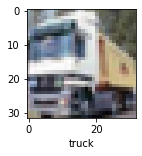

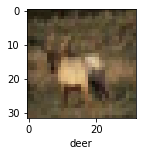

In [2]:
# plot samples
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[y[index]])

plot_sample(X_train, y_train, 1), plot_sample(X_train, y_train, 3)

# ANN

In [3]:
# define and train model
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), # use test set shape
    keras.layers.Dense(3000, activation="relu"),
    keras.layers.Dense(1000, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

ann.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# in this case we don't need to one hot encode y using sparse_categorical_crossentropy (single value)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 3s 1ms/step - loss: 1.8093 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6215 - accuracy: 0.4287
Epoch 3/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5393 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4819 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4314 - accuracy: 0.4988


In [4]:
y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.53      0.56      1000
           1       0.52      0.73      0.61      1000
           2       0.39      0.32      0.35      1000
           3       0.34      0.31      0.32      1000
           4       0.58      0.18      0.27      1000
           5       0.44      0.32      0.37      1000
           6       0.41      0.74      0.53      1000
           7       0.55      0.54      0.55      1000
           8       0.63      0.60      0.62      1000
           9       0.50      0.58      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.47     10000
weighted avg       0.49      0.49      0.47     10000



# CNN

In [9]:
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

# define and train model
cnn = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)), # filter means amount of features
    keras.layers.MaxPooling2D((2, 2)), # can use average pooling as well

    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"), 
    keras.layers.MaxPooling2D((2, 2)),

    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# in this case we don't need to one hot encode y using sparse_categorical_crossentropy (single value)


In [10]:
# huge accuracy improvement
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4988 - accuracy: 0.4601
Epoch 2/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1600 - accuracy: 0.5918
Epoch 3/50
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0254 - accuracy: 0.6378
Epoch 4/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9486 - accuracy: 0.6686
Epoch 5/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8833 - accuracy: 0.6917
Epoch 6/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8378 - accuracy: 0.7062
Epoch 7/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7947 - accuracy: 0.7215
Epoch 8/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7613 - accuracy: 0.7344
Epoch 9/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7283 - accuracy: 0.7446
Epoch 10/50
1563/1563 [==============================] - 3s 2ms/step - loss: 0.698

In [11]:
y_pred = cnn.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      1000
           1       0.70      0.85      0.77      1000
           2       0.56      0.54      0.55      1000
           3       0.48      0.40      0.44      1000
           4       0.62      0.58      0.60      1000
           5       0.53      0.60      0.56      1000
           6       0.74      0.75      0.75      1000
           7       0.69      0.76      0.72      1000
           8       0.83      0.75      0.79      1000
           9       0.78      0.71      0.74      1000

    accuracy                           0.67     10000
   macro avg       0.66      0.67      0.66     10000
weighted avg       0.66      0.67      0.66     10000



In [19]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization

def cnn_best():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	model.compile(optimizer="SGD", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
	return model

cnn_best = cnn_best()

cnn_best.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 19s 5ms/step - loss: 2.2342 - accuracy: 0.2977
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4486 - accuracy: 0.4720
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2730 - accuracy: 0.5384
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1590 - accuracy: 0.5882
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0785 - accuracy: 0.6160
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0240 - accuracy: 0.6376
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9826 - accuracy: 0.6512
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9399 - accuracy: 0.6693
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9071 - accuracy: 0.6817
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.87

In [20]:
y_pred = cnn_best.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.94      0.91      0.92      1000
           2       0.83      0.73      0.77      1000
           3       0.76      0.63      0.69      1000
           4       0.74      0.90      0.81      1000
           5       0.78      0.76      0.77      1000
           6       0.84      0.92      0.88      1000
           7       0.88      0.86      0.87      1000
           8       0.88      0.94      0.91      1000
           9       0.90      0.92      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

